**Welcome**,

today we are wokring upon Stroke Data for machine learning to predict to Whether
if a person is going to have a stroke or not.

let's get started by importing the nessecary libraries.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cs
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Dataset

In [7]:
df=pd.read_csv('/content/drive/MyDrive/Archive/stroke_data.csv')

Using head to have glimpse of the data in the dataset.

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


Checking the dimension of the dataset using shape function.

In [9]:
df.shape

(29065, 11)

Checking for the missing values.

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Using the describe function to know more about the numerical values in the dataset.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29065.0,47.676174,18.732941,10.00,32.00,48.00,62.00,82.00
hypertension,29065.0,0.111509,0.314766,0.00,0.00,0.00,0.00,1.00
heart_disease,29065.0,0.052159,0.222351,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,29065.0,106.405639,45.272453,55.01,77.63,92.13,113.91,291.05
bmi,29065.0,30.054684,7.193951,10.10,25.00,28.90,33.90,92.00
stroke,29065.0,0.018854,0.136013,0.00,0.00,0.00,0.00,1.00


Nunique functions helps us to know the no. of unique values in a row.


In [12]:
df.nunique()

gender                   2
age                     73
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    11041
bmi                    516
smoking_status           3
stroke                   2
dtype: int64

In [13]:
plt.style.use('dark_background')

Plotting a graph to understand distribution of ages in the dataset.



<ipython-input-14-a3666771f386>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

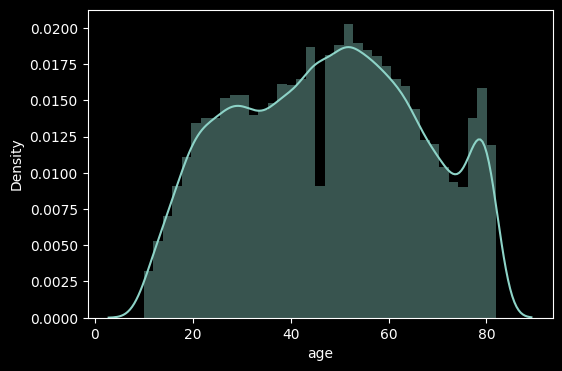

In [14]:
plt.figure(figsize=(6,4),dpi=100)
sns.distplot(df['age'],hist=True)

Plotting graphs to understand the relation between glucose level and age between genders.

<Axes: xlabel='age', ylabel='avg_glucose_level'>

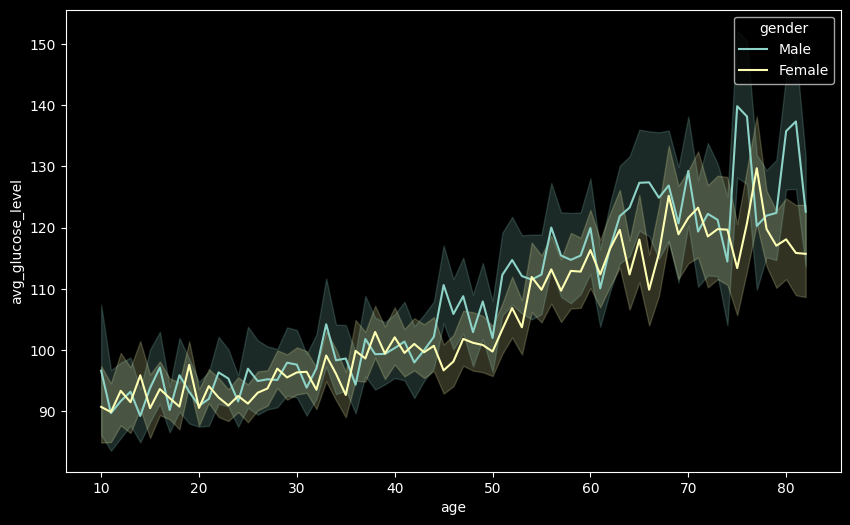

In [15]:

plt.figure(figsize=(10,6),dpi=100)
sns.lineplot(x='age',y='avg_glucose_level',data=df,hue='gender')

Creating bins for age and categorizing them into a category.

In [16]:
bins=[0,20,40,60,80,100]
df['Age-Group']=pd.cut(df['age'],bins=bins,labels=['Below 20','20-40','40-60','60-80','80-100'],include_lowest=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age-Group
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,40-60
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,60-80
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,40-60
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,60-80
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
29060,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,Below 20
29061,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,40-60
29062,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-100
29063,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,20-40


Plotting a graph to know more about glucose level lvl between diffrent age groups.

<Axes: xlabel='Age-Group', ylabel='avg_glucose_level'>

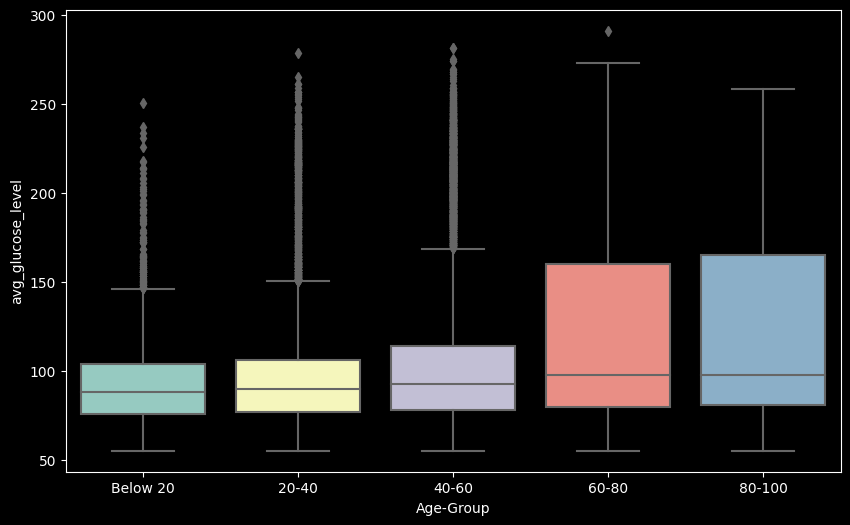

In [17]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(x='Age-Group',y='avg_glucose_level',data=df)

Using countplot to create a graph to compare people's smoking habbits.

<Axes: >

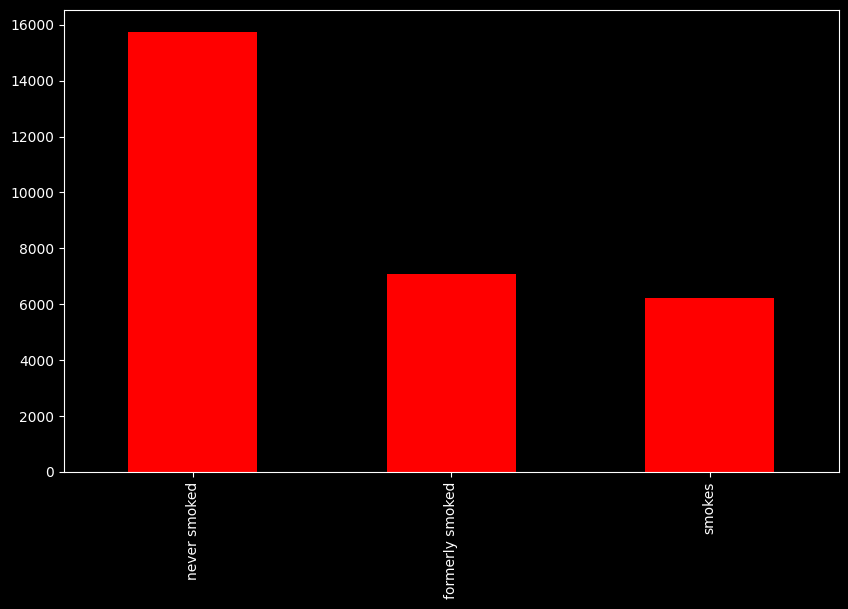

In [18]:
plt.figure(figsize=(10,6))
df['smoking_status'].value_counts().plot(kind='bar',color='red')

Plotting a graph to comapre people's work type using countplot.

<Axes: >

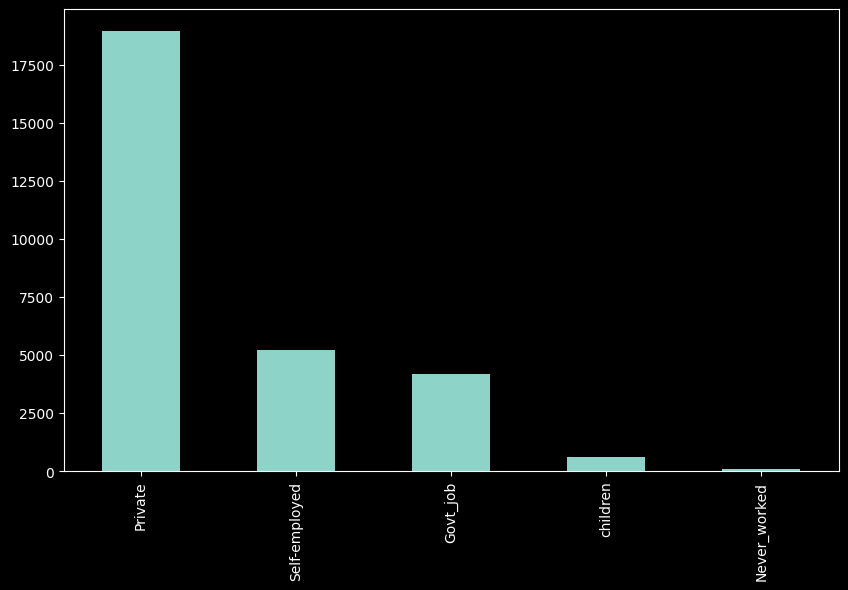

In [19]:
plt.figure(figsize=(10,6))
df['work_type'].value_counts().plot(kind='bar')

Plotting bmi against age to know more about the relation between them.

<Axes: xlabel='age', ylabel='bmi'>

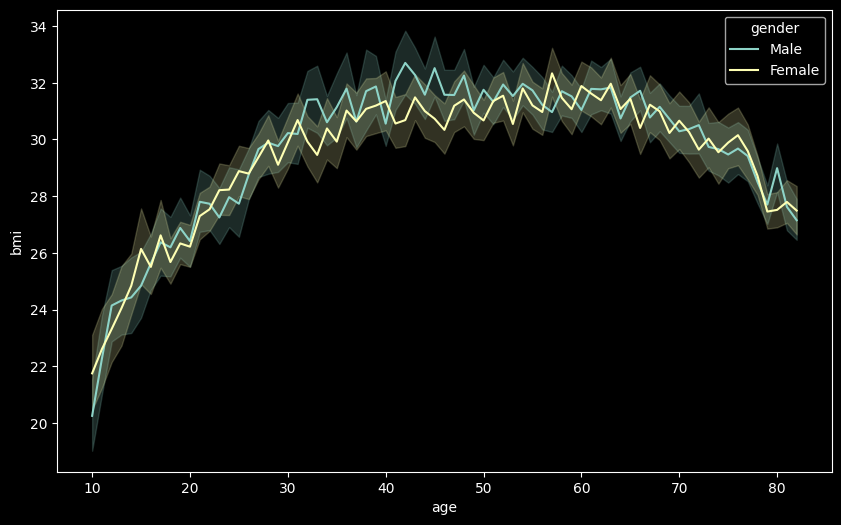

In [20]:
plt.figure(figsize=(10,6),dpi=100)
sns.lineplot(x='age',y='bmi',data=df,hue='gender')

Plotting a graph to find the corealtion between bmi and avg. glucose level.

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

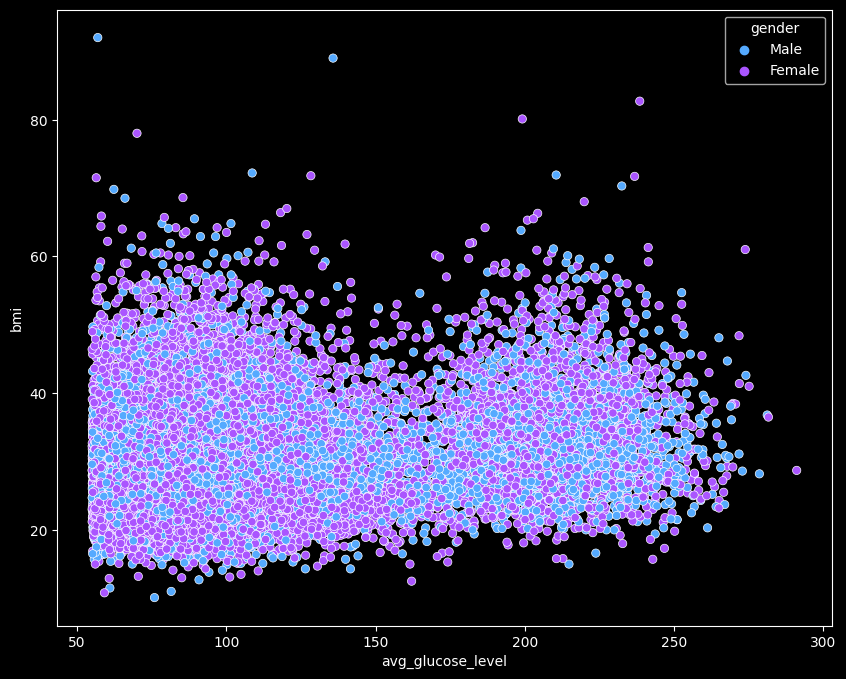

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='avg_glucose_level',y='bmi',data=df,palette='cool',hue='gender')

Using pairplot to know coorelation between diffrent columns in the dataset.

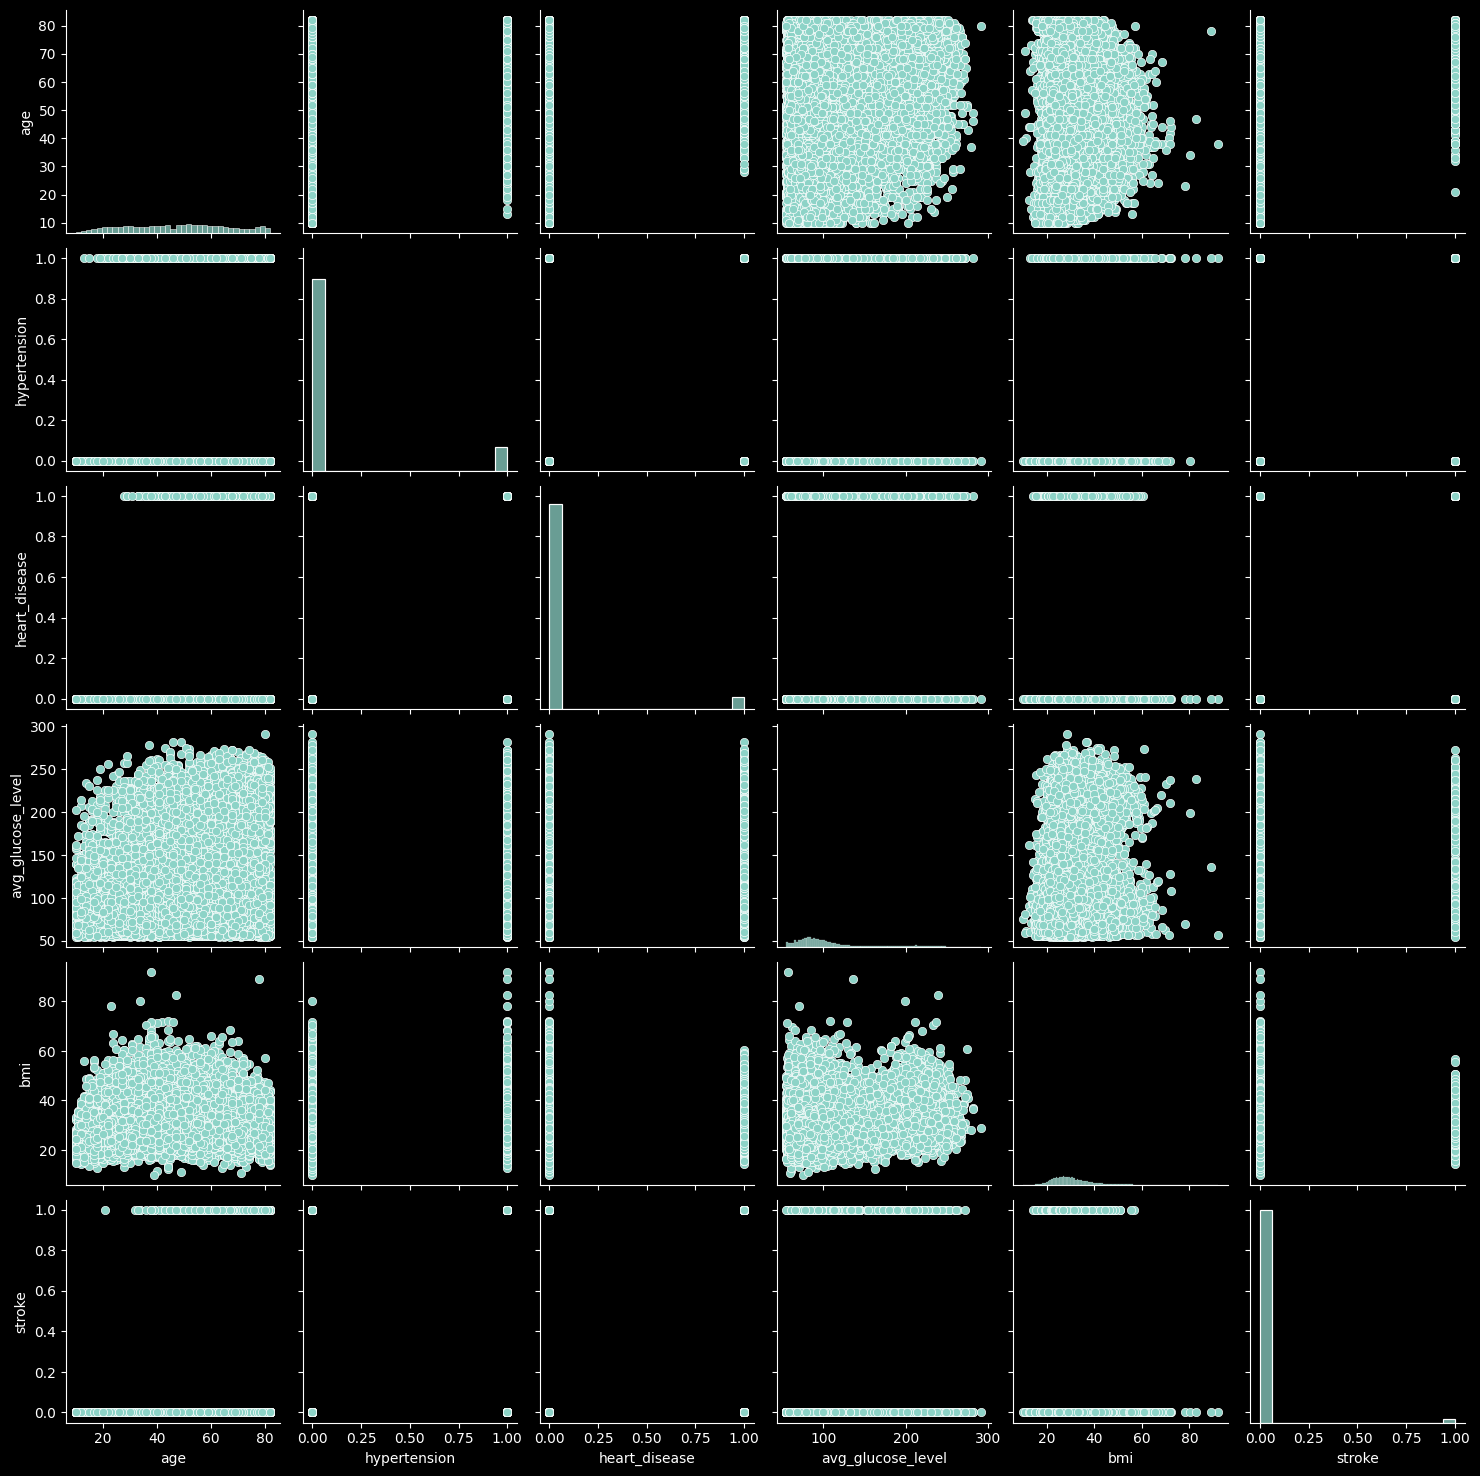

In [22]:
sns.pairplot(df)

Plotting heatmap to find the coorelation between the diffrent numerical columns.

<ipython-input-23-033c87a7270f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

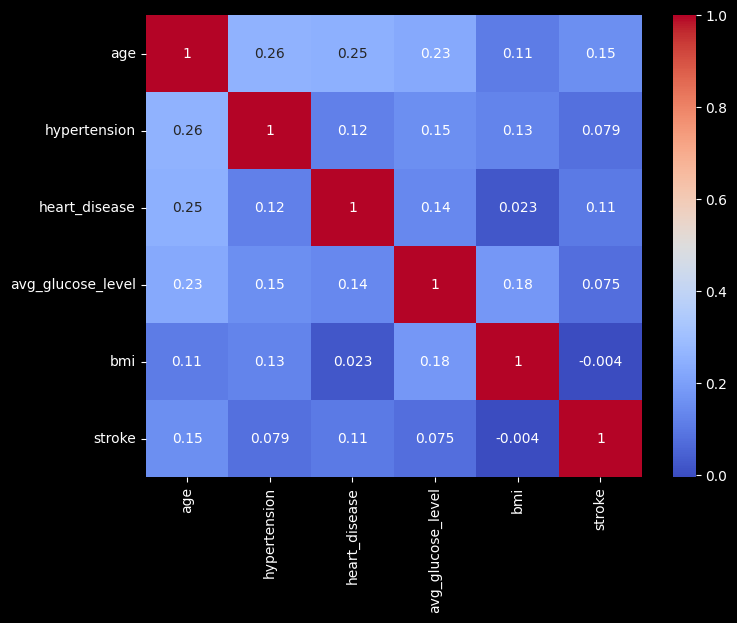

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Using info function to know data types and null columns in a dataset.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             29065 non-null  object  
 1   age                29065 non-null  float64 
 2   hypertension       29065 non-null  int64   
 3   heart_disease      29065 non-null  int64   
 4   ever_married       29065 non-null  object  
 5   work_type          29065 non-null  object  
 6   Residence_type     29065 non-null  object  
 7   avg_glucose_level  29065 non-null  float64 
 8   bmi                29065 non-null  float64 
 9   smoking_status     29065 non-null  object  
 10  stroke             29065 non-null  int64   
 11  Age-Group          29065 non-null  category
dtypes: category(1), float64(3), int64(3), object(5)
memory usage: 2.5+ MB


In [25]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

Mapping Residence type with 1 & 0 to do Feature Enginerring which makes our model more accurate.

We will do the same for ever married and gender columns.

In [26]:
df['Residence_type']=df['Residence_type'].map({'Urban':1,'Rural':0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age-Group
0,Male,58.0,1,0,Yes,Private,1,87.96,39.2,never smoked,0,40-60
1,Female,70.0,0,0,Yes,Private,0,69.04,35.9,formerly smoked,0,60-80
2,Female,52.0,0,0,Yes,Private,1,77.59,17.7,formerly smoked,0,40-60
3,Female,75.0,0,1,Yes,Self-employed,0,243.53,27.0,never smoked,0,60-80
4,Female,32.0,0,0,Yes,Private,0,77.67,32.3,smokes,0,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
29060,Female,10.0,0,0,No,children,1,58.64,20.4,never smoked,0,Below 20
29061,Female,56.0,0,0,Yes,Govt_job,1,213.61,55.4,formerly smoked,0,40-60
29062,Female,82.0,1,0,Yes,Private,1,91.94,28.9,formerly smoked,0,80-100
29063,Male,40.0,0,0,Yes,Private,1,99.16,33.2,never smoked,0,20-40


In [27]:
df['gender']=df['gender'].map({'Male':0,'Female':1})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age-Group
0,0,58.0,1,0,Yes,Private,1,87.96,39.2,never smoked,0,40-60
1,1,70.0,0,0,Yes,Private,0,69.04,35.9,formerly smoked,0,60-80
2,1,52.0,0,0,Yes,Private,1,77.59,17.7,formerly smoked,0,40-60
3,1,75.0,0,1,Yes,Self-employed,0,243.53,27.0,never smoked,0,60-80
4,1,32.0,0,0,Yes,Private,0,77.67,32.3,smokes,0,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,10.0,0,0,No,children,1,58.64,20.4,never smoked,0,Below 20
29061,1,56.0,0,0,Yes,Govt_job,1,213.61,55.4,formerly smoked,0,40-60
29062,1,82.0,1,0,Yes,Private,1,91.94,28.9,formerly smoked,0,80-100
29063,0,40.0,0,0,Yes,Private,1,99.16,33.2,never smoked,0,20-40


In [28]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age-Group
0,0,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,40-60
1,1,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,60-80
2,1,52.0,0,0,1,Private,1,77.59,17.7,formerly smoked,0,40-60
3,1,75.0,0,1,1,Self-employed,0,243.53,27.0,never smoked,0,60-80
4,1,32.0,0,0,1,Private,0,77.67,32.3,smokes,0,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,10.0,0,0,0,children,1,58.64,20.4,never smoked,0,Below 20
29061,1,56.0,0,0,1,Govt_job,1,213.61,55.4,formerly smoked,0,40-60
29062,1,82.0,1,0,1,Private,1,91.94,28.9,formerly smoked,0,80-100
29063,0,40.0,0,0,1,Private,1,99.16,33.2,never smoked,0,20-40


We will be using the get dummies to create columns for multi-category columns like work type and smoking habbits.

In [29]:
work_type=pd.get_dummies(df['work_type'])
df=pd.concat([df,work_type],axis=1)
df=df.drop('work_type',axis=1)

In [30]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age-Group,Govt_job,Never_worked,Private,Self-employed,children
0,0,58.0,1,0,1,1,87.96,39.2,never smoked,0,40-60,0,0,1,0,0
1,1,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,60-80,0,0,1,0,0
2,1,52.0,0,0,1,1,77.59,17.7,formerly smoked,0,40-60,0,0,1,0,0
3,1,75.0,0,1,1,0,243.53,27.0,never smoked,0,60-80,0,0,0,1,0
4,1,32.0,0,0,1,0,77.67,32.3,smokes,0,20-40,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,10.0,0,0,0,1,58.64,20.4,never smoked,0,Below 20,0,0,0,0,1
29061,1,56.0,0,0,1,1,213.61,55.4,formerly smoked,0,40-60,1,0,0,0,0
29062,1,82.0,1,0,1,1,91.94,28.9,formerly smoked,0,80-100,0,0,1,0,0
29063,0,40.0,0,0,1,1,99.16,33.2,never smoked,0,20-40,0,0,1,0,0


In [31]:
smoker=pd.get_dummies(df['smoking_status'])
df=pd.concat([df,smoker],axis=1)
df=df.drop('smoking_status',axis=1)

In [32]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Age-Group,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,58.0,1,0,1,1,87.96,39.2,0,40-60,0,0,1,0,0,0,1,0
1,1,70.0,0,0,1,0,69.04,35.9,0,60-80,0,0,1,0,0,1,0,0
2,1,52.0,0,0,1,1,77.59,17.7,0,40-60,0,0,1,0,0,1,0,0
3,1,75.0,0,1,1,0,243.53,27.0,0,60-80,0,0,0,1,0,0,1,0
4,1,32.0,0,0,1,0,77.67,32.3,0,20-40,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,10.0,0,0,0,1,58.64,20.4,0,Below 20,0,0,0,0,1,0,1,0
29061,1,56.0,0,0,1,1,213.61,55.4,0,40-60,1,0,0,0,0,1,0,0
29062,1,82.0,1,0,1,1,91.94,28.9,0,80-100,0,0,1,0,0,1,0,0
29063,0,40.0,0,0,1,1,99.16,33.2,0,20-40,0,0,1,0,0,0,1,0


Dropping the columns we dont need and may confuse the model.

In [33]:
df.drop('Age-Group',axis=1,inplace=True)

Assinging values to X and y to perform train test split.

In [34]:
x=df.drop('stroke',axis=1)
y=df['stroke']


Importing train test split from sklearn.module.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

We will be also using StandardScaler to standardize the data for removing outliers to effect our model.

In [36]:
from sklearn.preprocessing import StandardScaler

Transforming the data in using fit transform.

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [39]:
y=y.values

In [40]:
import warnings
warnings.simplefilter(action='ignore')

Importing important libraries.

In [41]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,r2_score,accuracy_score,roc_auc_score,RocCurveDisplay

Creating a function to evaluate scores of every classification algorithm.

In [43]:
def classify(classification,x_train,y_train,x_test,y_test):
    clf=classification.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print('='*35)
    print(i)
    print('-'*35)
    print('Confusion Matrix=','\n',confusion_matrix(y_test,pred>0.5))
    print('-'*35)
    acc=accuracy_score(y_test,pred>0.5)
    print('Accuracy score=',acc)
    print('-'*35)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_report=cross_val_score(i,x,y,cv=kfold,scoring='accuracy')
    print('Cross-Validation Score=',cv_report.mean())
    print('-'*35)
    print('Roc-Auc-Score=',roc_auc_score(y_test,pred))
    print('='*35)


Creating a list of algorithms to evaluate every algorithms.

In [44]:
models = [
    LinearRegression(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier()
]


We need to balance the data in order to prevent overfitting and underfitting the model.

In [45]:
df['stroke'].value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [46]:
pip install imblearn

In [47]:

from collections import Counter

We will use RandomOverSampler from imblearn module to create random samples in the model which will help to prevent overfitting and underfitting as we can see the there's a lot of diffrence between both classes.

In [48]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(x,y)


In [49]:
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 28517), (1, 28517)] (57034,)


We will use the classify function we created before to get the best scores from every algorithm.

In [50]:
for i in models:
  classify(i,x_resampled,y_resampled,x_test,y_test)

LinearRegression()
-----------------------------------
Confusion Matrix= 
 [[6175 2395]
 [  29  121]]
-----------------------------------
Accuracy score= 0.7220183486238532
-----------------------------------
Cross-Validation Score= nan
-----------------------------------
Roc-Auc-Score= 0.8371816413846751
LogisticRegression()
-----------------------------------
Confusion Matrix= 
 [[6395 2175]
 [  34  116]]
-----------------------------------
Accuracy score= 0.7466743119266055
-----------------------------------
Cross-Validation Score= 0.981145707896095
-----------------------------------
Roc-Auc-Score= 0.7597705173084404
DecisionTreeClassifier()
-----------------------------------
Confusion Matrix= 
 [[8570    0]
 [   0  150]]
-----------------------------------
Accuracy score= 1.0
-----------------------------------
Cross-Validation Score= 0.9607775675210734
-----------------------------------
Roc-Auc-Score= 1.0
RandomForestClassifier()
-----------------------------------
Confusion M

Training the model to get the best accuracy to find the best fold in the dataset.

In [52]:
x=df.drop('stroke',axis=1)
y=df['stroke']
fold = 0
aucs = []
kfold= StratifiedKFold()
for train_idx,val_idx in kfold.split(x,y):
  X_tr=x.iloc[train_idx]
  y_tr=y.iloc[train_idx]

  X_val=x.iloc[val_idx]
  y_val=y.iloc[val_idx]

  clf = RandomForestClassifier()
  clf.fit(X_tr, y_tr)
  pred = clf.predict(X_val)
  pred_prob = clf.predict_proba(X_val)[:, 1]
  acc_score = accuracy_score(y_val, pred)
  auc_score = roc_auc_score(y_val, pred_prob)
  print(f"======= Fold {fold} ========")
  print(
        f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
  )
  fold += 1
  aucs.append(auc_score)
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')



======= Fold 0 ========
Our accuracy on the validation set is 0.9806 and AUC is 0.7443
======= Fold 1 ========
Our accuracy on the validation set is 0.9809 and AUC is 0.7320
======= Fold 2 ========
Our accuracy on the validation set is 0.9809 and AUC is 0.7038
======= Fold 3 ========
Our accuracy on the validation set is 0.9809 and AUC is 0.7133
======= Fold 4 ========
Our accuracy on the validation set is 0.9811 and AUC is 0.7398
Our out of fold AUC score is 0.7266


We can move forward with RandomForestClassification algorithm as it has high accuracy.

In [55]:
clf=RandomForestClassifier()

In [56]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
preds=clf.predict(x_test)

In [69]:
print('Accuracy Score',accuracy_score(y_test,preds>0.5))
print('\n')
print('Classification Report','\n',classification_report(y_test,preds>0.5))
print('\n')
print('Confusion Matrix','\n',confusion_matrix(y_test,preds))

Accuracy Score 0.9827981651376146


Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8570
           1       0.50      0.01      0.01       150

    accuracy                           0.98      8720
   macro avg       0.74      0.50      0.50      8720
weighted avg       0.97      0.98      0.97      8720



Confusion Matrix 
 [[8569    1]
 [ 149    1]]
